# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn:  Astrid Hansen

Vem du har presenterat för: Camilla Månsson

Datum då du presenterade:  09.05.2024

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


In [2]:
model = ResNet50(weights='imagenet')

In [ ]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [ ]:
x = image.img_to_array(img)
x.shape

In [ ]:
x = np.expand_dims(x, axis=0)
x.shape

# 1. Take some pictures yourself and predict their class.

In [19]:
image_paths = ["skor.jpg", "solglasogon.jpg", "amerikansk_fotboll.jpg",
               "kotte.jpg", "elefant.jpg", "blomma.jpg",
               "globus.jpg", "lampa.jpg", "vattenkanna.jpg", "sax.jpg"]

image_list = []
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    image_list.append(img)


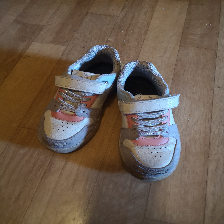

In [20]:
image_list[0]


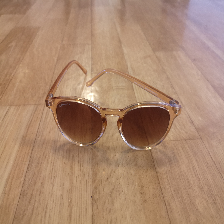

In [21]:
image_list[1]

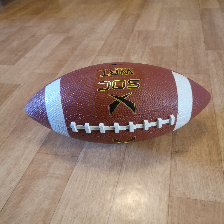

In [22]:
image_list[2]

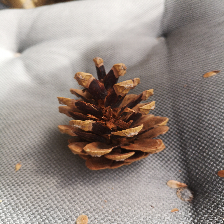

In [23]:
image_list[3]

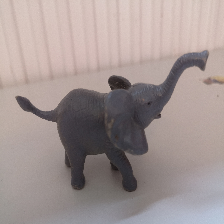

In [24]:
image_list[4]

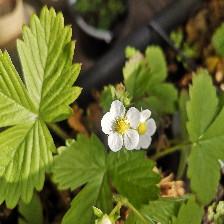

In [25]:
image_list[5]

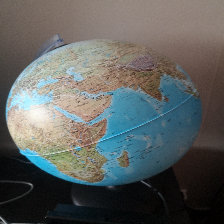

In [26]:
image_list[6]

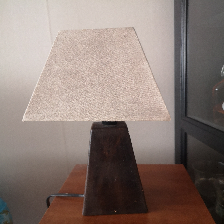

In [27]:
image_list[7]

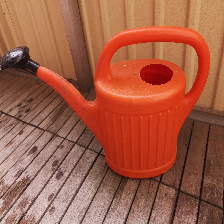

In [28]:
image_list[8]

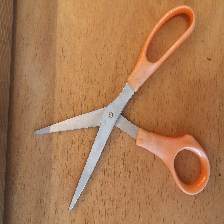

In [29]:
image_list[9]

In [30]:
# Changing image_list to numpy array
image_array = []

for img in image_list:
    x = image.img_to_array(img)
    image_array.append(x)

image_array = np.array(image_array)

In [31]:
image_array.shape

(10, 224, 224, 3)

In [32]:
expanded_images= []

for img in image_array:
    x = np.expand_dims(img, axis=0)
    expanded_images.append(x)

img_array = np.array(expanded_images)

img_array.shape

(10, 1, 224, 224, 3)

In [34]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
# resnet.preprocess_input will convert the input images from RGB to BGR
# then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

image_data = preprocess_input(img_array)

In [35]:
Y_proba = model.predict(image_data[0])
top_K = decode_predictions(Y_proba, top=3)

top_K

1/1 [==============================] - 1s 1s/step


[[('n02909870', 'bucket', 0.4099298),
  ('n04120489', 'running_shoe', 0.17418014),
  ('n03047690', 'clog', 0.13539611)]]

In [36]:
# predict the whole array
Y_proba_list = model.predict(image_data)

1/1 [==============================] - 2s 2s/step


In [37]:
top_K = decode_predictions(Y_proba_list, top=3)

In [38]:
for image_index in range(len(image_list)):
    image_name = image_paths[image_index]
    print("Image #{} - {}".format(image_index, image_name))
    for class_id, name, y_proba_list in top_K[image_index]:
        print(" {} - {:12s} {:.2f}%".format(class_id, name, y_proba_list * 100))
    print()

Image #0 - skor.jpg
 n02909870 - bucket       40.99%
 n04120489 - running_shoe 17.42%
 n03047690 - clog         13.54%

Image #1 - solglasogon.jpg
 n04356056 - sunglasses   91.04%
 n04355933 - sunglass     8.73%
 n07892512 - red_wine     0.03%

Image #2 - amerikansk_fotboll.jpg
 n02786058 - Band_Aid     52.01%
 n04118538 - rugby_ball   15.18%
 n03720891 - maraca       13.70%

Image #3 - kotte.jpg
 n07753592 - banana       34.35%
 n04597913 - wooden_spoon 14.63%
 n01774750 - tarantula    9.67%

Image #4 - elefant.jpg
 n02099429 - curly-coated_retriever 70.43%
 n02113799 - standard_poodle 26.89%
 n02099849 - Chesapeake_Bay_retriever 0.61%

Image #5 - blomma.jpg
 n12768682 - buckeye      71.06%
 n03991062 - pot          5.98%
 n11939491 - daisy        3.32%

Image #6 - globus.jpg
 n09229709 - bubble       20.13%
 n02965783 - car_mirror   10.28%
 n02799071 - baseball     9.78%

Image #7 - lampa.jpg
 n03637318 - lampshade    36.74%
 n04380533 - table_lamp   32.70%
 n03223299 - doormat      

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

It is useful if you have a limited amount of data to train your model. Then you can benifit from already trained models that are trained on a similar dataset. A pretrained model as the ResNet loaded above has been trained on a big amount of data, and has an extensive architecture. The model have already learned to identify patterns in the data, and also trained weights so they have an optimal value. When using these pretrained models you are using all the learnings obtained from these models. 

Transfer learning is the metod of using these pretrained models to create a new neural network based upon the leaernings of the pretrained models. Typically the top layers from the pretrained model is changed so they match the wanted outputs of the new task at hand. The weights are from the pretrained models layers are often freezed at first, but can during the training of the new network be unfreezed and adjusted so they are optimized for the current taks.